In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
from plotnine import ggplot, aes, geom_bar, theme_minimal, labs, facet_wrap

KeyError: "['group'] not found in axis"

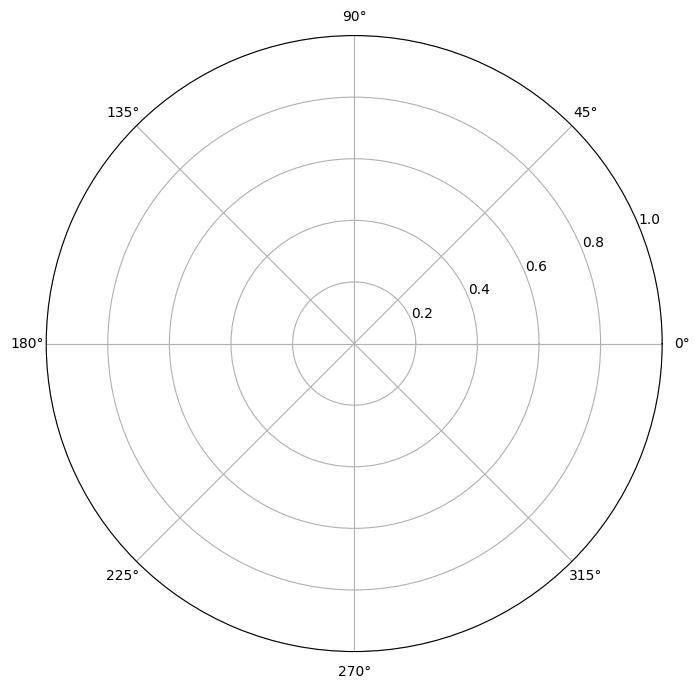

In [4]:

###雷达图
# 创建示例数据



# 转换数据
categories = list(data.columns[1:])
N = len(categories)

# 设置雷达图角度
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# 初始化图像
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# 绘制
for i in range(len(data)):
    values = data.loc[i].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=data['group'][i])
    ax.fill(angles, values, alpha=0.1)

# 设置类别标签
plt.xticks(angles[:-1], categories)

# 添加标题和图例
plt.title('Different Detectors Performance (Trained on Hazy Images)',y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

In [3]:
data = pd.DataFrame({
    'Model': ['DCP', 'FFA-Net','RIDCP','DehazeFormer','C2PNet','GridDehaze','DSANet','gUNet','MixDehaze'],
    'PNSR': [16.98,19.25,16.15,17.53,21.31,12.66,19.01,19.49,15.52],
    'SSIM': [0.82, 0.79,0.718,0.802,0.832,0.713,0.751,0.822,0.743],
    'mAP in real haze set':[20.5,22,24.2,21.9,22.4,19.6,22.4,22.2,21.2],
    'mAP in synthetic haze set':[44,41.2,44.8,42.5,42.9,38.9,40.8,42.7,39.9]

})

/tmp/ipykernel_142902/394024993.py:20: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


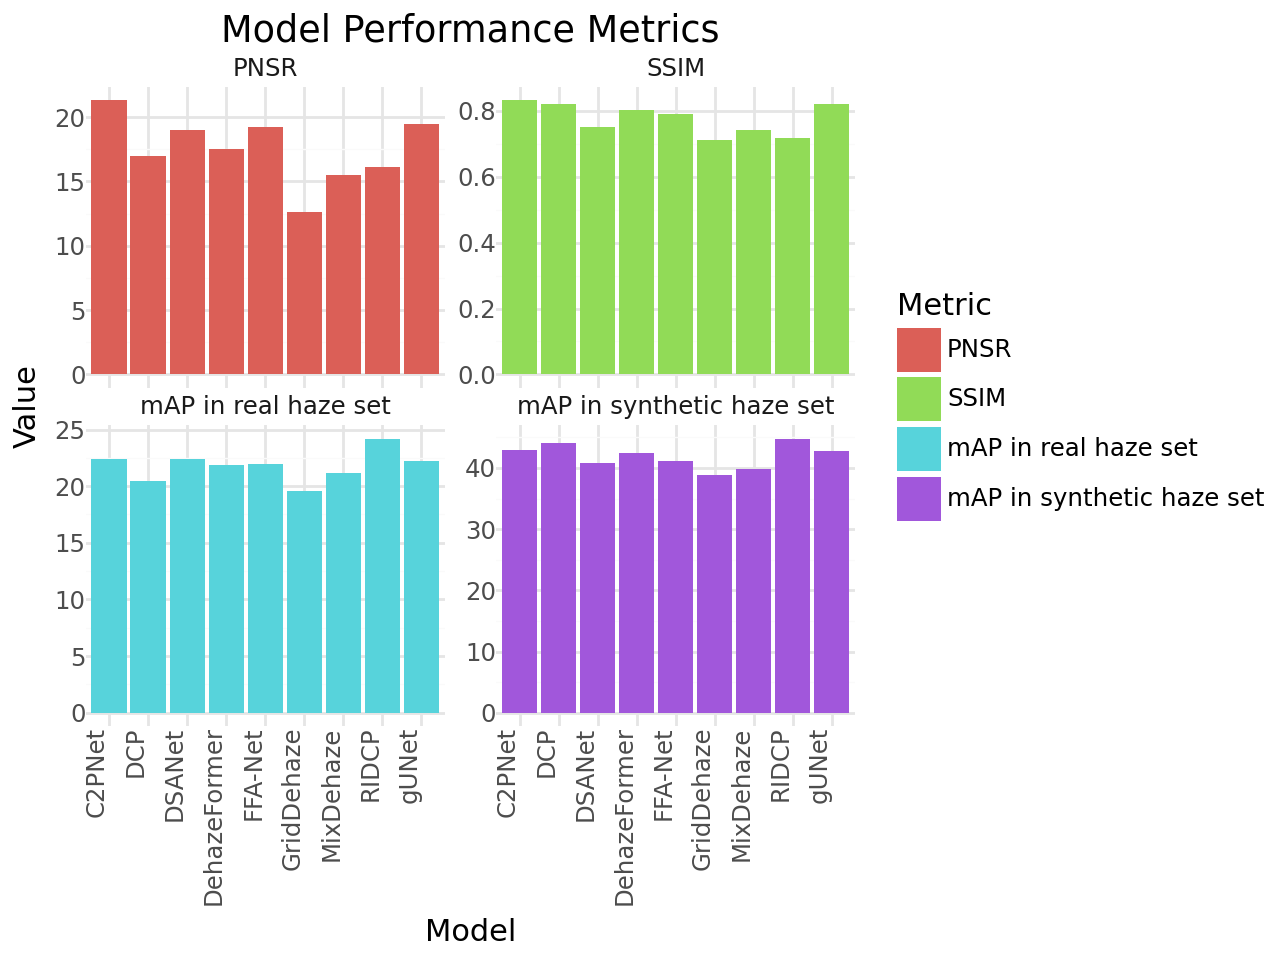

In [5]:
# 转换数据
from plotnine import element_text, theme


data_melted = pd.melt(data, id_vars='Model', var_name='Metric', value_name='Value')

# 创建柱状图
plot = (ggplot(data_melted, aes(x='Model', y='Value', fill='Metric'))
        + geom_bar(stat='identity', position='dodge')
        + theme_minimal()
        + labs(title='Model Performance Metrics',
               x='Model',
               y='Value')
        + facet_wrap('~Metric', scales='free_y')
       )

# 旋转x轴标签
plot += theme(axis_text_x=element_text(angle=90, hjust=1))

print(plot)